In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data =pd.read_csv( '/content/weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
data.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
X = data.drop('Weather Type', axis=1)
y = data['Weather Type']

In [ ]:
categorical_cols = ['Cloud Cover', 'Season', 'Location']
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeriacal', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

In [ ]:
X_processed = preprocessor.fit_transform(X)

y_encoded = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.3, random_state=13)

 Function to plot the confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()


Logistic Regression

Logistic Regression Accuracy: 86.74%


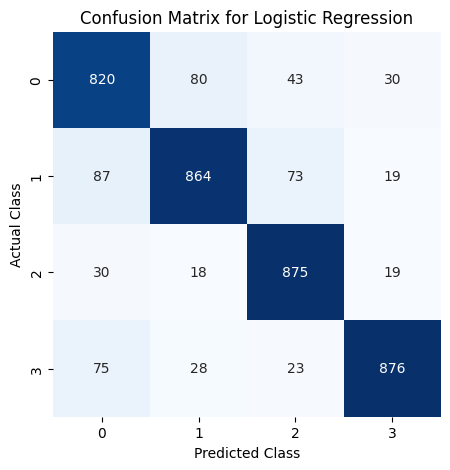

In [ ]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train.argmax(axis=1))
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_logistic)
print(f"Logistic Regression Accuracy: {logistic_accuracy * 100:.2f}%")

cm_logistic = confusion_matrix(y_test.argmax(axis=1), y_pred_logistic)
plot_confusion_matrix(cm_logistic, "Logistic Regression")



K-Nearest Neighbors (KNN)

KNN Accuracy: 89.80%


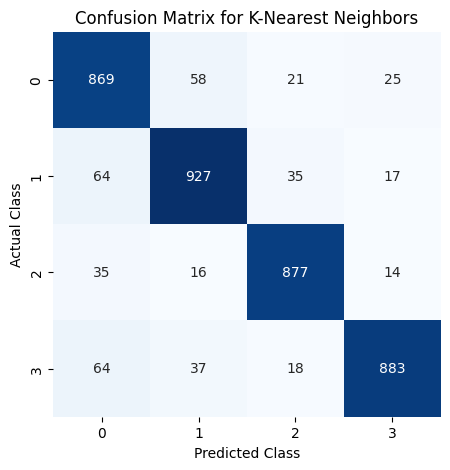

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train.argmax(axis=1))
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

cm_knn = confusion_matrix(y_test.argmax(axis=1), y_pred_knn)
plot_confusion_matrix(cm_knn, "K-Nearest Neighbors")



Decision Tree

Decision Tree Accuracy: 90.68%


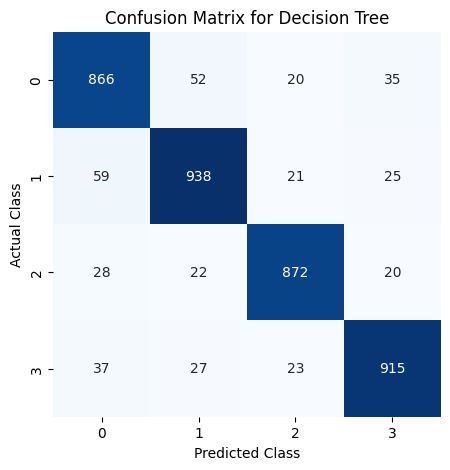

In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train.argmax(axis=1))
y_pred_tree = decision_tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_tree)
print(f"Decision Tree Accuracy: {tree_accuracy * 100:.2f}%")

cm_tree = confusion_matrix(y_test.argmax(axis=1), y_pred_tree)
plot_confusion_matrix(cm_tree, "Decision Tree")

Random Forest

Random Forest Accuracy: 91.36%


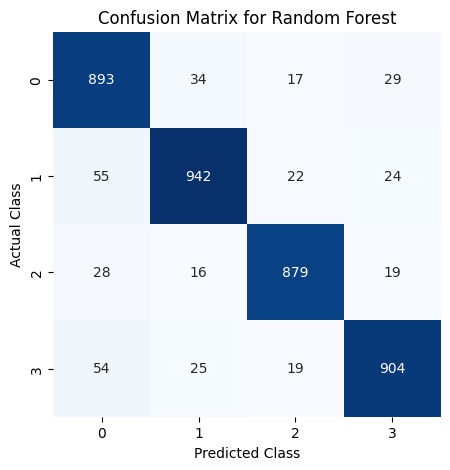

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train.argmax(axis=1))
y_pred_rf = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

cm_rf = confusion_matrix(y_test.argmax(axis=1), y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest")

 Support Vector Machine (SVM)

SVM Accuracy: 91.16%


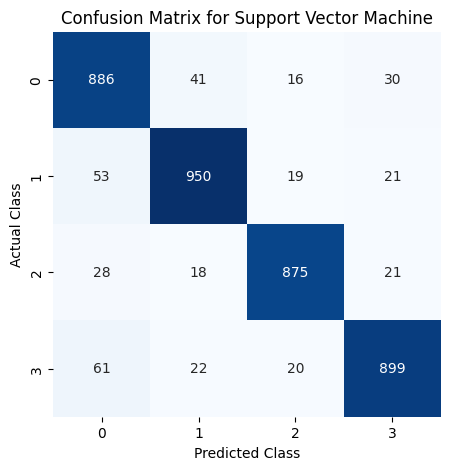

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train.argmax(axis=1))
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

cm_svm = confusion_matrix(y_test.argmax(axis=1), y_pred_svm)
plot_confusion_matrix(cm_svm, "Support Vector Machine")

Naive Bayes

Naive Bayes Accuracy: 78.74%


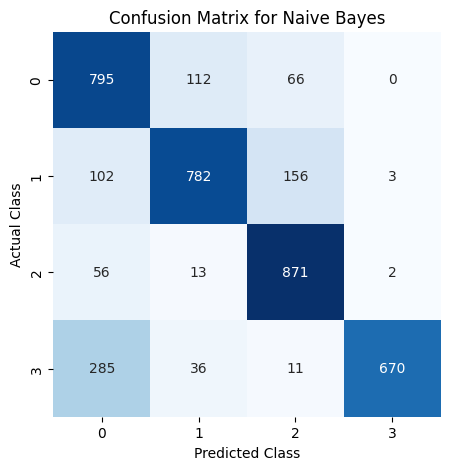

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.argmax(axis=1))  # Remove toarray() as X_train is already a dense array
y_pred_nb = nb_model.predict(X_test) # Remove toarray() as X_test is already a dense array
nb_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

cm_nb = confusion_matrix(y_test.argmax(axis=1), y_pred_nb)
plot_confusion_matrix(cm_nb, "Naive Bayes")

Artificial Neural Network (ANN)

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(y_train.shape[1], activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the ANN model

In [ ]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6678 - loss: 0.9370 - val_accuracy: 0.8766 - val_loss: 0.3580
Epoch 2/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8947 - loss: 0.3121 - val_accuracy: 0.8896 - val_loss: 0.2841
Epoch 3/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9037 - loss: 0.2457 - val_accuracy: 0.8934 - val_loss: 0.2633
Epoch 4/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9126 - loss: 0.2175 - val_accuracy: 0.8918 - val_loss: 0.2547
Epoch 5/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9198 - loss: 0.2049 - val_accuracy: 0.8923 - val_loss: 0.2517
Epoch 6/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.2028 - val_accuracy: 0.8961 - val_loss: 0.2421
Epoch 7/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9224 - loss: 0.1853 - val_accuracy: 0.8939 - val_loss: 0.2427
Epoch 8/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9206 - loss: 0.1944 - val_accuracy: 0.

In [ ]:
test_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print(f"ANN Accuracy: {ann_accuracy * 100:.2f}%")

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9113 - loss: 0.2976
ANN Accuracy: 90.66%


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


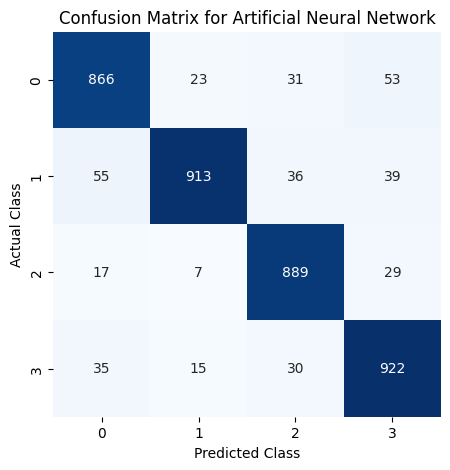

In [ ]:
y_pred_ann = ann_model.predict(X_test).argmax(axis=1)

cm_ann = confusion_matrix(y_test.argmax(axis=1), y_pred_ann)
plot_confusion_matrix(cm_ann, "Artificial Neural Network")

<ipython-input-22-05a0a81a1d8b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="viridis")


Text(0, 0.5, 'Model')

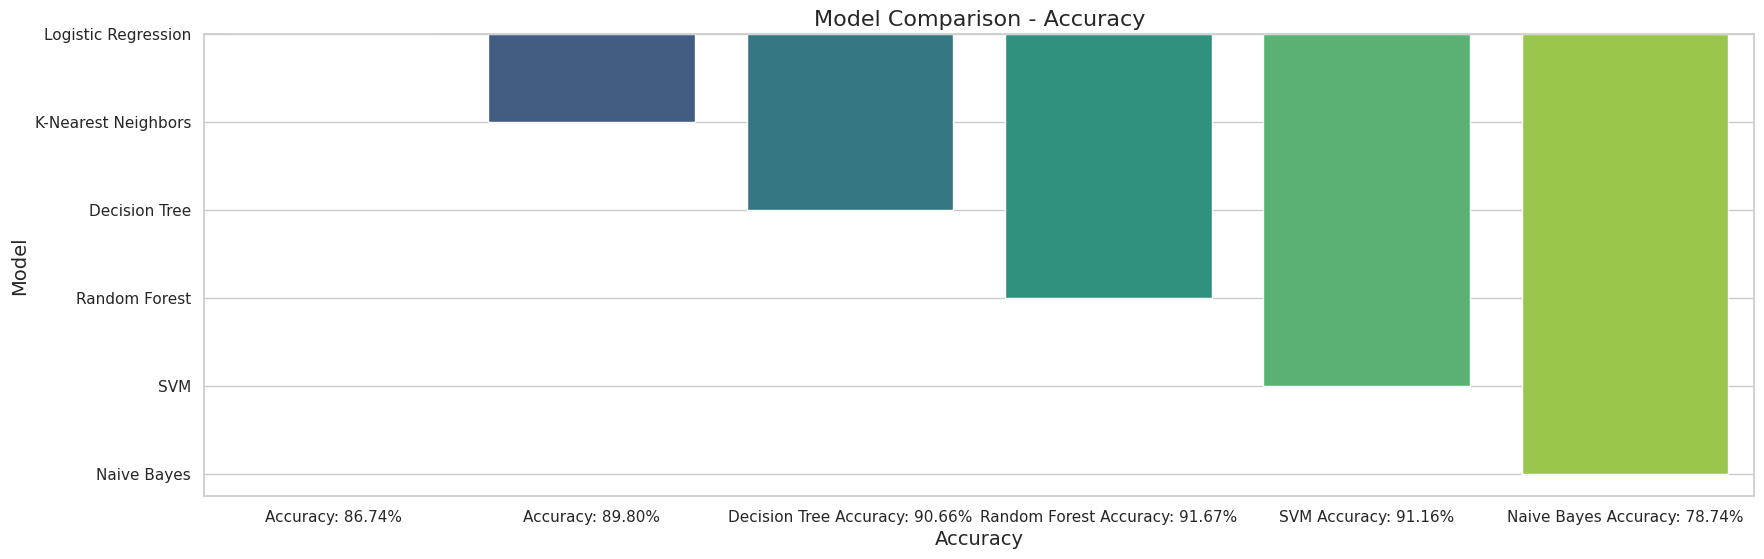

In [ ]:
models = {
    'Logistic Regression': 'Accuracy: 86.74%',
    'K-Nearest Neighbors':'Accuracy: 89.80%',
    'Decision Tree': 'Decision Tree Accuracy: 90.66%',
    'Random Forest': 'Random Forest Accuracy: 91.67%',
    'SVM': 'SVM Accuracy: 91.16%',
    'Naive Bayes': 'Naive Bayes Accuracy: 78.74%'
}

sns.set(style="whitegrid")
model_names = list(models.keys())
accuracies = list(models.values())


plt.figure(figsize=(20, 6))
sns.barplot(x=accuracies, y=model_names, palette="viridis")

plt.title("Model Comparison - Accuracy", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)